In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import colormaps


# Cash money command to measure the execution of the program: ./run-sing-trial.sh 1 16000 | grep "execution time" | sed 's/\/0.00/ /g' | gawk '{print $4}'


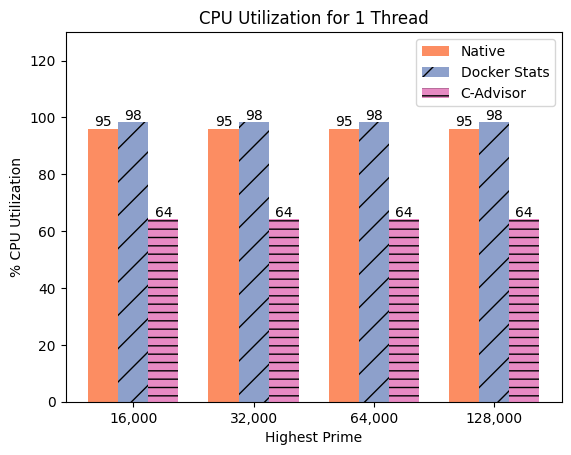

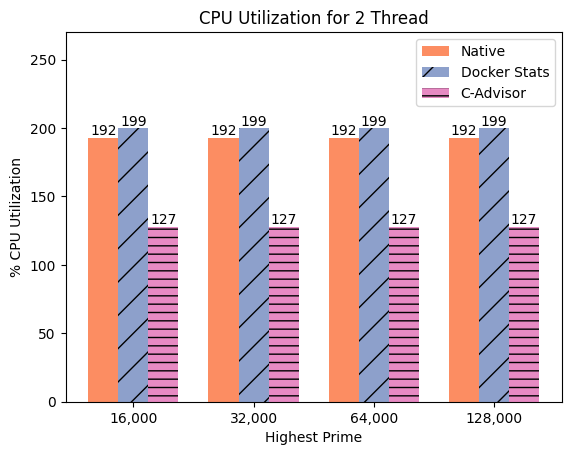

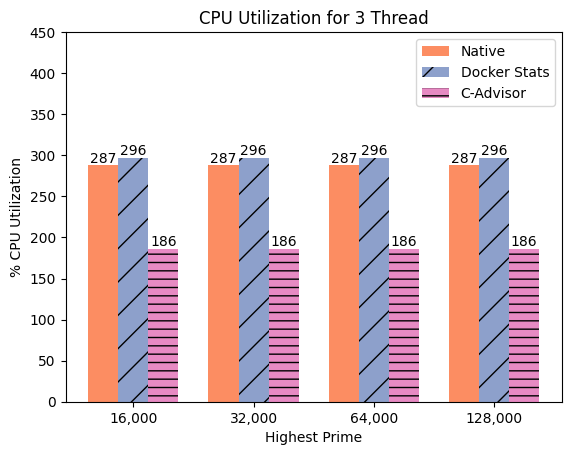

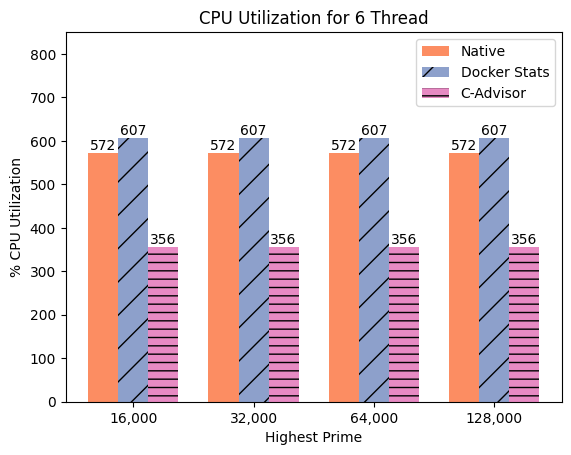

In [3]:
# This page will have the graphs for the Java file
import pandas as pd


data = []

# The maximum number of threads that we ran!
for t in [1, 2, 3, 6]:
    # The maximum of number of primes in each run * 1000
    for num in [16, 32, 64, 128]:
        native = []
        docker_stats = []
        c_advisor = []
        # Run average for the native computation
        csv_file = pd.read_csv(f'/Users/felipeyanaga/UNC/Spring2023/COMP730/final-project/native/native-{num * 1000}-{t}.csv')
        sum = 0 
        count = 0
        for i, row in csv_file.iterrows(): 
            count += 1
            sum = sum + float(row[1])

        result = sum/count
        
        native.append(result)
        
        # Run average for the docker stats computation
        csv_file = pd.read_csv(f'/Users/felipeyanaga/UNC/Spring2023/COMP730/final-project/docker-stats/docker-stats-{num}-{t}.csv')
        sum = 0 
        count = 0
        for i, row in csv_file.iterrows(): 
            count += 1
            sum = sum + float(row[0])

        result = sum/count
        

        docker_stats.append(result)
            
        csv_file = pd.read_csv(f'/Users/felipeyanaga/UNC/Spring2023/COMP730/final-project/c-advisor/c-advisor-{num}-{t}.csv')
        sum = 0 
        count = 0
        for i, row in csv_file.iterrows(): 
            count += 1
            sum = sum + float(row[1])

        result = sum/count
        
        c_advisor.append(result)
        
        data.append(native)
        data.append(docker_stats)
        data.append(c_advisor)
    
    
    ind = np.arange(4)

    width = 0.25

    fix, ax = plt.subplots() 

    cmap = colormaps.get_cmap('Set2')

    bars1 = ax.bar(ind, data[0], width, color=cmap(1 % cmap.N))
    bars2 = ax.bar(ind+width, data[1], width, color=cmap(2 % cmap.N), hatch="/")
    bars3 = ax.bar(ind+2*width, data[2], width, color=cmap(3 % cmap.N), hatch="--")


    if (t == 1):
        plt.ylim(0,130)
    elif t == 2:
        plt.ylim(0,270)
    elif t == 3:
        plt.ylim(0,450)
    else:
        plt.ylim(0,850)

    ax.set_ylabel('% CPU Utilization')
    ax.set_xlabel("Highest Prime")
    ax.set_title(f'CPU Utilization for {t} Thread')
    ax.set_xticks(ind+1*width)
    ax.set_xticklabels(('16,000', '32,000', '64,000', '128,000'))
    ax.legend((bars1[0], bars2[0], bars3[0]), ('Native', 'Docker Stats', 'C-Advisor'))

    # add value labels to the bars
    def autolabel(bars):
        for bar in bars:
            height = bar.get_height()
            ax.text(bar.get_x() + bar.get_width()/2., height,
                    '%d' % int(height),
                    ha='center', va='bottom')

    autolabel(bars1)
    autolabel(bars2)
    autolabel(bars3)

    plt.show()
    
    data = []





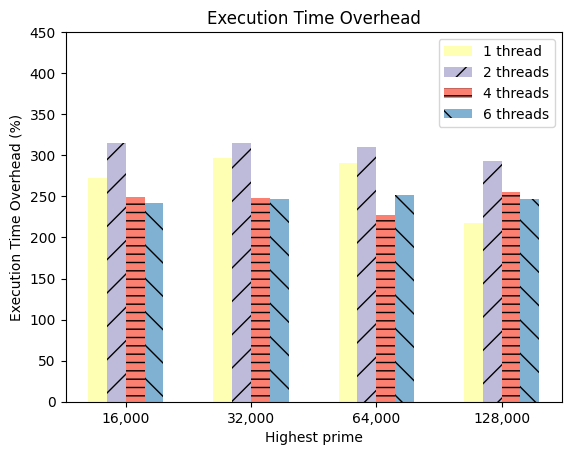

In [4]:
# Do execution time things on this cell. 

_1 = [2.725468683 * 100, 2.96258145 * 100, 2.903407417 * 100, 2.177522275 * 100]
_2 = [3.153191085 * 100, 3.149689839* 100, 3.096299069 * 100, 2.928896859 * 100]
_4 = [2.489554801 * 100, 2.480878325 * 100, 2.270398185 * 100, 2.548827275 * 100]
_6 = [2.420151431 * 100, 2.470273888 * 100, 2.516602479 * 100, 2.464787062 * 100]

ind = np.arange(4)

width = 0.15

fix, ax = plt.subplots() 

cmap = colormaps.get_cmap('Set3')

bars1 = ax.bar(ind, _1, width, color=cmap(1 % cmap.N))
bars2 = ax.bar(ind+width, _2, width, color=cmap(2 % cmap.N), hatch="/")
bars3 = ax.bar(ind+2*width, _4, width, color=cmap(3 % cmap.N), hatch="--")
bars4 = ax.bar(ind+3*width, _6 , width, color=cmap(4 % cmap.N), hatch="\\")

# if (t == 1):
#     plt.ylim(0,130)
# elif t == 2:
#     plt.ylim(0,270)
# elif t == 3:
#     plt.ylim(0,450)
# else:
#     plt.ylim(0,550)

ax.set_ylabel('Execution Time Overhead (%)')
ax.set_xlabel('Highest prime')
ax.set_title(f'Execution Time Overhead')
ax.set_xticks(ind+1.5*width)
ax.set_xticklabels(('16,000', '32,000', '64,000', '128,000'))
ax.legend((bars1[0], bars2[0], bars3[0], bars4[0]), ('1 thread', '2 threads', '4 threads', '6 threads'))

# add value labels to the bars
# def autolabel(bars):
#     for bar in bars:
#         height = bar.get_height()
#         ax.text(bar.get_x() + bar.get_width()/2., height,
#                 '%d' % int(height),
#                 ha='center', va='bottom')

# autolabel(bars1)
# autolabel(bars2)
# autolabel(bars3)
# autolabel(bars4)

plt.ylim(0, 450)
plt.show()

data = []

[2.502238649570419, 5.557802967240807, 6.779183680036242, 2.7978036736390504]


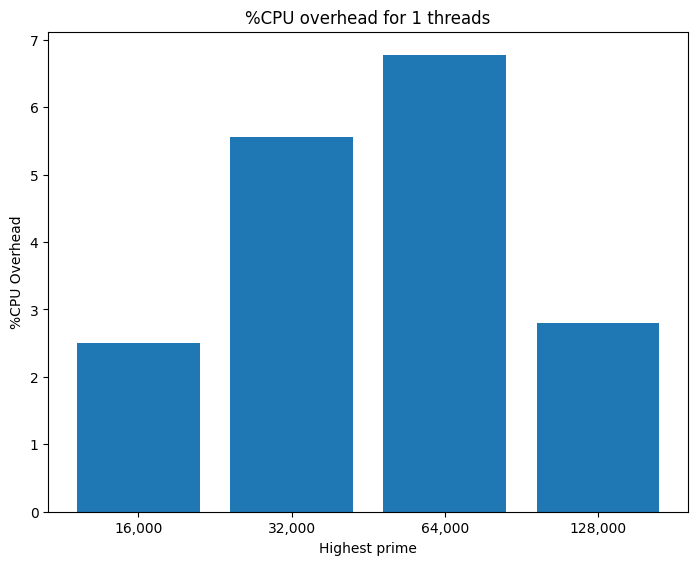

[3.540432846834693, 4.801701549878113, 3.4887004304368654, 4.770470654695154]


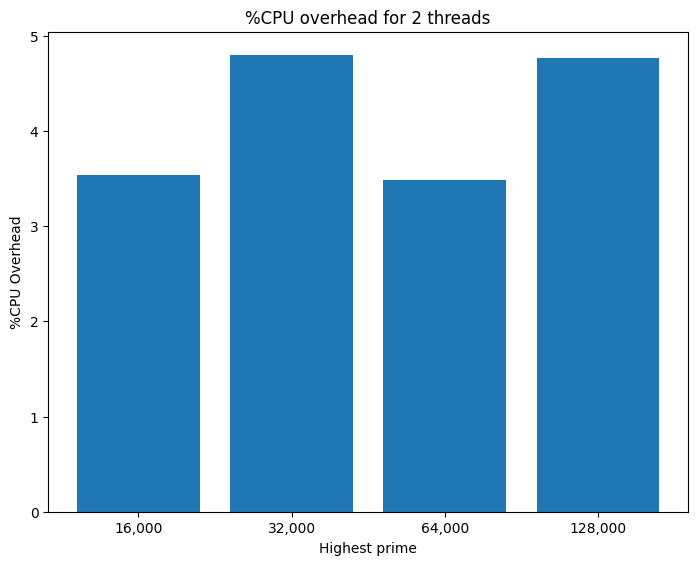

[3.1797383048635544, 4.246576497052757, 0.8322768241422106, 2.034184490792559]


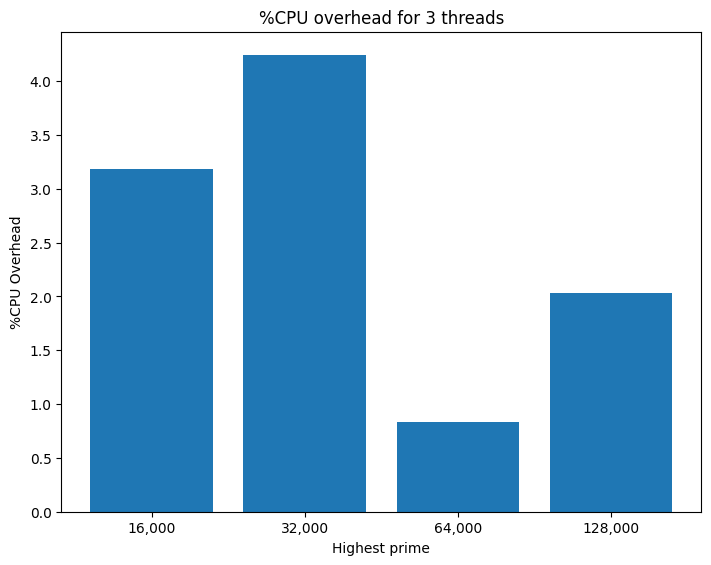

[6.181588821593636, 12.701279832629753, 4.38517964318271, 7.44303364290347]


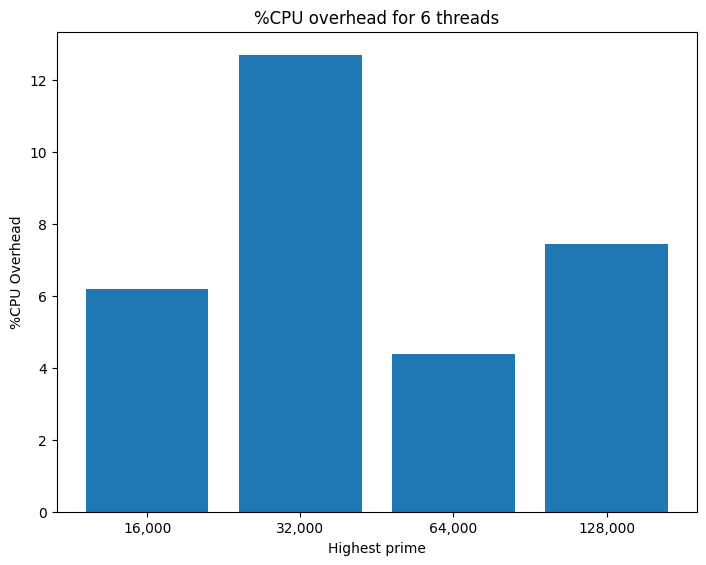

In [5]:
# CPU Overhead Calculations on this cell. 

# This page will have the graphs for the Java file
import pandas as pd

data = []

# The maximum number of threads that we ran!
for t in [1, 2, 3, 6]:
    # The maximum of number of primes in each run * 1000
    for num in [16, 32, 64, 128]:
        overhead = []
        # Run average for the native computation
        csv_file = pd.read_csv(f'/Users/felipeyanaga/UNC/Spring2023/COMP730/final-project/native/native-{num * 1000}-{t}.csv')
        sum = 0 
        count = 0
        for i, row in csv_file.iterrows(): 
            count += 1
            sum = sum + float(row[1])

        native_result = sum/count
        
        # Run average for the docker stats computation
        csv_file = pd.read_csv(f'/Users/felipeyanaga/UNC/Spring2023/COMP730/final-project/docker-stats/docker-stats-{num}-{t}.csv')
        sum = 0 
        count = 0
        for i, row in csv_file.iterrows(): 
            count += 1
            sum = sum + float(row[0])

        docker_result = sum/count
        
        val = ((docker_result - native_result) / native_result) * 100
        
        data.append(val)

    print(data)
    
    fig = plt.figure()
    
    ax = fig.add_axes([0,0,1,1])
    ax.set_title(f'%CPU overhead for {t} threads')
    ax.set_xlabel("Highest prime")
    ax.set_ylabel("%CPU Overhead")
    
    values = ["16,000", "32,000", "64,000","128,000"]
    
    ax.bar(values, data)
    
    plt.show()
    data = []